#Step 1 Importing Library


In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

# Step 2 Importing Dataset

In [3]:
# Importing the zipfile module
import zipfile

# Creating a ZipFile object with the file name
zip_file = zipfile.ZipFile("/content/archive.zip")

# Extracting all the files in the current directory
zip_file.extractall()

# Closing the ZipFile object
zip_file.close()


In [4]:
#beth_df_1 = pd.read_csv("labelled_training_data.csv")
import pandas as pd
beth_df_1=pd.read_csv('/content/labelled_testing_data.csv',  encoding='ISO-8859-1')
beth_df_1.head()

,timestamp,processId,threadId,parentProcessId,userId,mountNamespace,processName,hostName,eventId,eventName,stackAddresses,argsNum,returnValue,args,sus,evil
0,129.050634,382,382,1,101,4026532232,systemd-resolve,ip-10-100-1-217,41,socket,"[140159195621643, 140159192455417, 94656731598...",3,15,"[{'name': 'domain', 'type': 'int', 'value': 'A...",0,0
1,129.051238,379,379,1,100,4026532231,systemd-network,ip-10-100-1-217,41,socket,"[139853228042507, 93935071185801, 93935080775184]",3,15,"[{'name': 'domain', 'type': 'int', 'value': 'A...",0,0
2,129.051434,1,1,0,0,4026531840,systemd,ip-10-100-1-217,1005,security_file_open,"[140362867191588, 8103505641674583858]",4,0,"[{'name': 'pathname', 'type': 'const char*', '...",0,0
3,129.051481,1,1,0,0,4026531840,systemd,ip-10-100-1-217,257,openat,[],4,17,"[{'name': 'dirfd', 'type': 'int', 'value': -10...",0,0
4,129.051522,1,1,0,0,4026531840,systemd,ip-10-100-1-217,5,fstat,[140362867189385],2,0,"[{'name': 'fd', 'type': 'int', 'value': 17}, {...",0,0


In [5]:
#beth_df_2 = pd.read_csv("labelled_testing_data.csv")
#beth_df_3 = pd.read_csv("labelled_validation_data.csv")
import pandas as pd
beth_df_2=pd.read_csv('/content/labelled_training_data.csv',  encoding='ISO-8859-1')
beth_df_2.head()
beth_df_3=pd.read_csv('/content/labelled_validation_data.csv',  encoding='ISO-8859-1')
beth_df_3.head()


,timestamp,processId,threadId,parentProcessId,userId,mountNamespace,processName,hostName,eventId,eventName,stackAddresses,argsNum,returnValue,args,sus,evil
0,124.439221,381,381,1,101,4026532232,systemd-resolve,ip-10-100-1-129,41,socket,"[139913106282763, 139913103116537, 94901962555...",3,15,"[{'name': 'domain', 'type': 'int', 'value': 'A...",0,0
1,124.439751,378,378,1,100,4026532231,systemd-network,ip-10-100-1-129,41,socket,"[140343254628619, 93967981149065, 93967990898192]",3,15,"[{'name': 'domain', 'type': 'int', 'value': 'A...",0,0
2,124.439958,1,1,0,0,4026531840,systemd,ip-10-100-1-129,1005,security_file_open,"[140074839310116, 8103505641674583864]",4,0,"[{'name': 'pathname', 'type': 'const char*', '...",0,0
3,124.440007,1,1,0,0,4026531840,systemd,ip-10-100-1-129,257,openat,[],4,12,"[{'name': 'dirfd', 'type': 'int', 'value': -10...",0,0
4,124.440037,1,1,0,0,4026531840,systemd,ip-10-100-1-129,5,fstat,[140074839307913],2,0,"[{'name': 'fd', 'type': 'int', 'value': 12}, {...",0,0


In [6]:
beth_df_1.shape


(188967, 16)

In [7]:
beth_df_2.shape

(763144, 16)

In [8]:
beth_df_3.shape

(188967, 16)

In [9]:
#Merge Dataframe
beth_df = pd.concat ([beth_df_1, beth_df_2, beth_df_3])
beth_df.shape

(1141078, 16)

In [10]:
#shuffle Dataframe
df = beth_df.sample(frac=1).reset_index(drop=True)

In [11]:
df.head(2)

,timestamp,processId,threadId,parentProcessId,userId,mountNamespace,processName,hostName,eventId,eventName,stackAddresses,argsNum,returnValue,args,sus,evil
0,3361.063046,7099,7099,1,0,4026531840,sshd,ip-10-100-1-57,3,close,[],1,0,"[{'name': 'fd', 'type': 'int', 'value': 7}]",0,0
1,2201.755649,7374,7374,1649,0,4026531840,ps,ip-10-100-1-28,1005,security_file_open,"[139984668999339, 32758250075010869]",4,0,"[{'name': 'pathname', 'type': 'const char*', '...",0,0


# STEP 3 Exploring the Dataset

<Axes: >

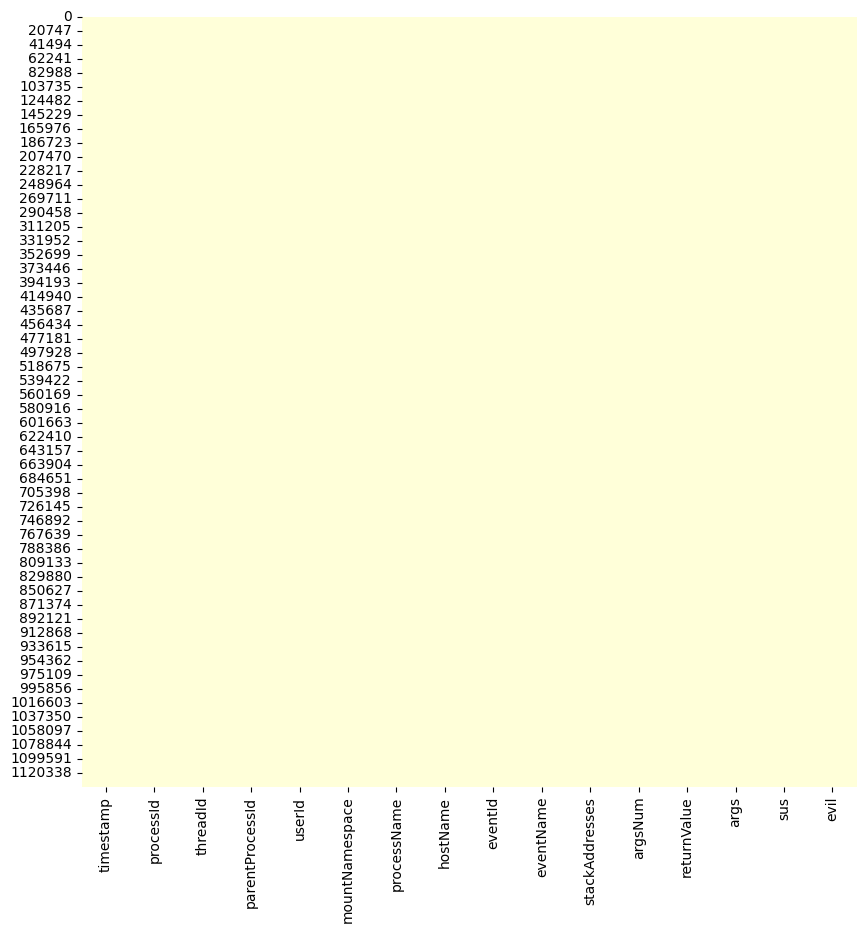

In [12]:
#check null value in the dataset
plt.figure(figsize = (10,10))
sns.heatmap(df.isnull(), cbar = False, cmap="YlGnBu")

In [13]:
new = df.drop(['parentProcessId','userId','mountNamespace','argsNum'], axis = 1)

In [14]:
new.head(5)

,timestamp,processId,threadId,processName,hostName,eventId,eventName,stackAddresses,returnValue,args,sus,evil
0,3361.063046,7099,7099,sshd,ip-10-100-1-57,3,close,[],0,"[{'name': 'fd', 'type': 'int', 'value': 7}]",0,0
1,2201.755649,7374,7374,ps,ip-10-100-1-28,1005,security_file_open,"[139984668999339, 32758250075010869]",0,"[{'name': 'pathname', 'type': 'const char*', '...",0,0
2,2700.449109,7410,7410,ps,ip-10-100-1-34,257,openat,[],9,"[{'name': 'dirfd', 'type': 'int', 'value': -10...",0,0
3,915.333120,7282,7282,systemd-udevd,ubuntu,3,close,[],0,"[{'name': 'fd', 'type': 'unsigned int', 'value...",0,0
4,903.047779,7352,7352,systemd-udevd,ubuntu,5,fstat,[],0,"[{'name': 'fd', 'type': 'int', 'value': 15}, {...",0,0


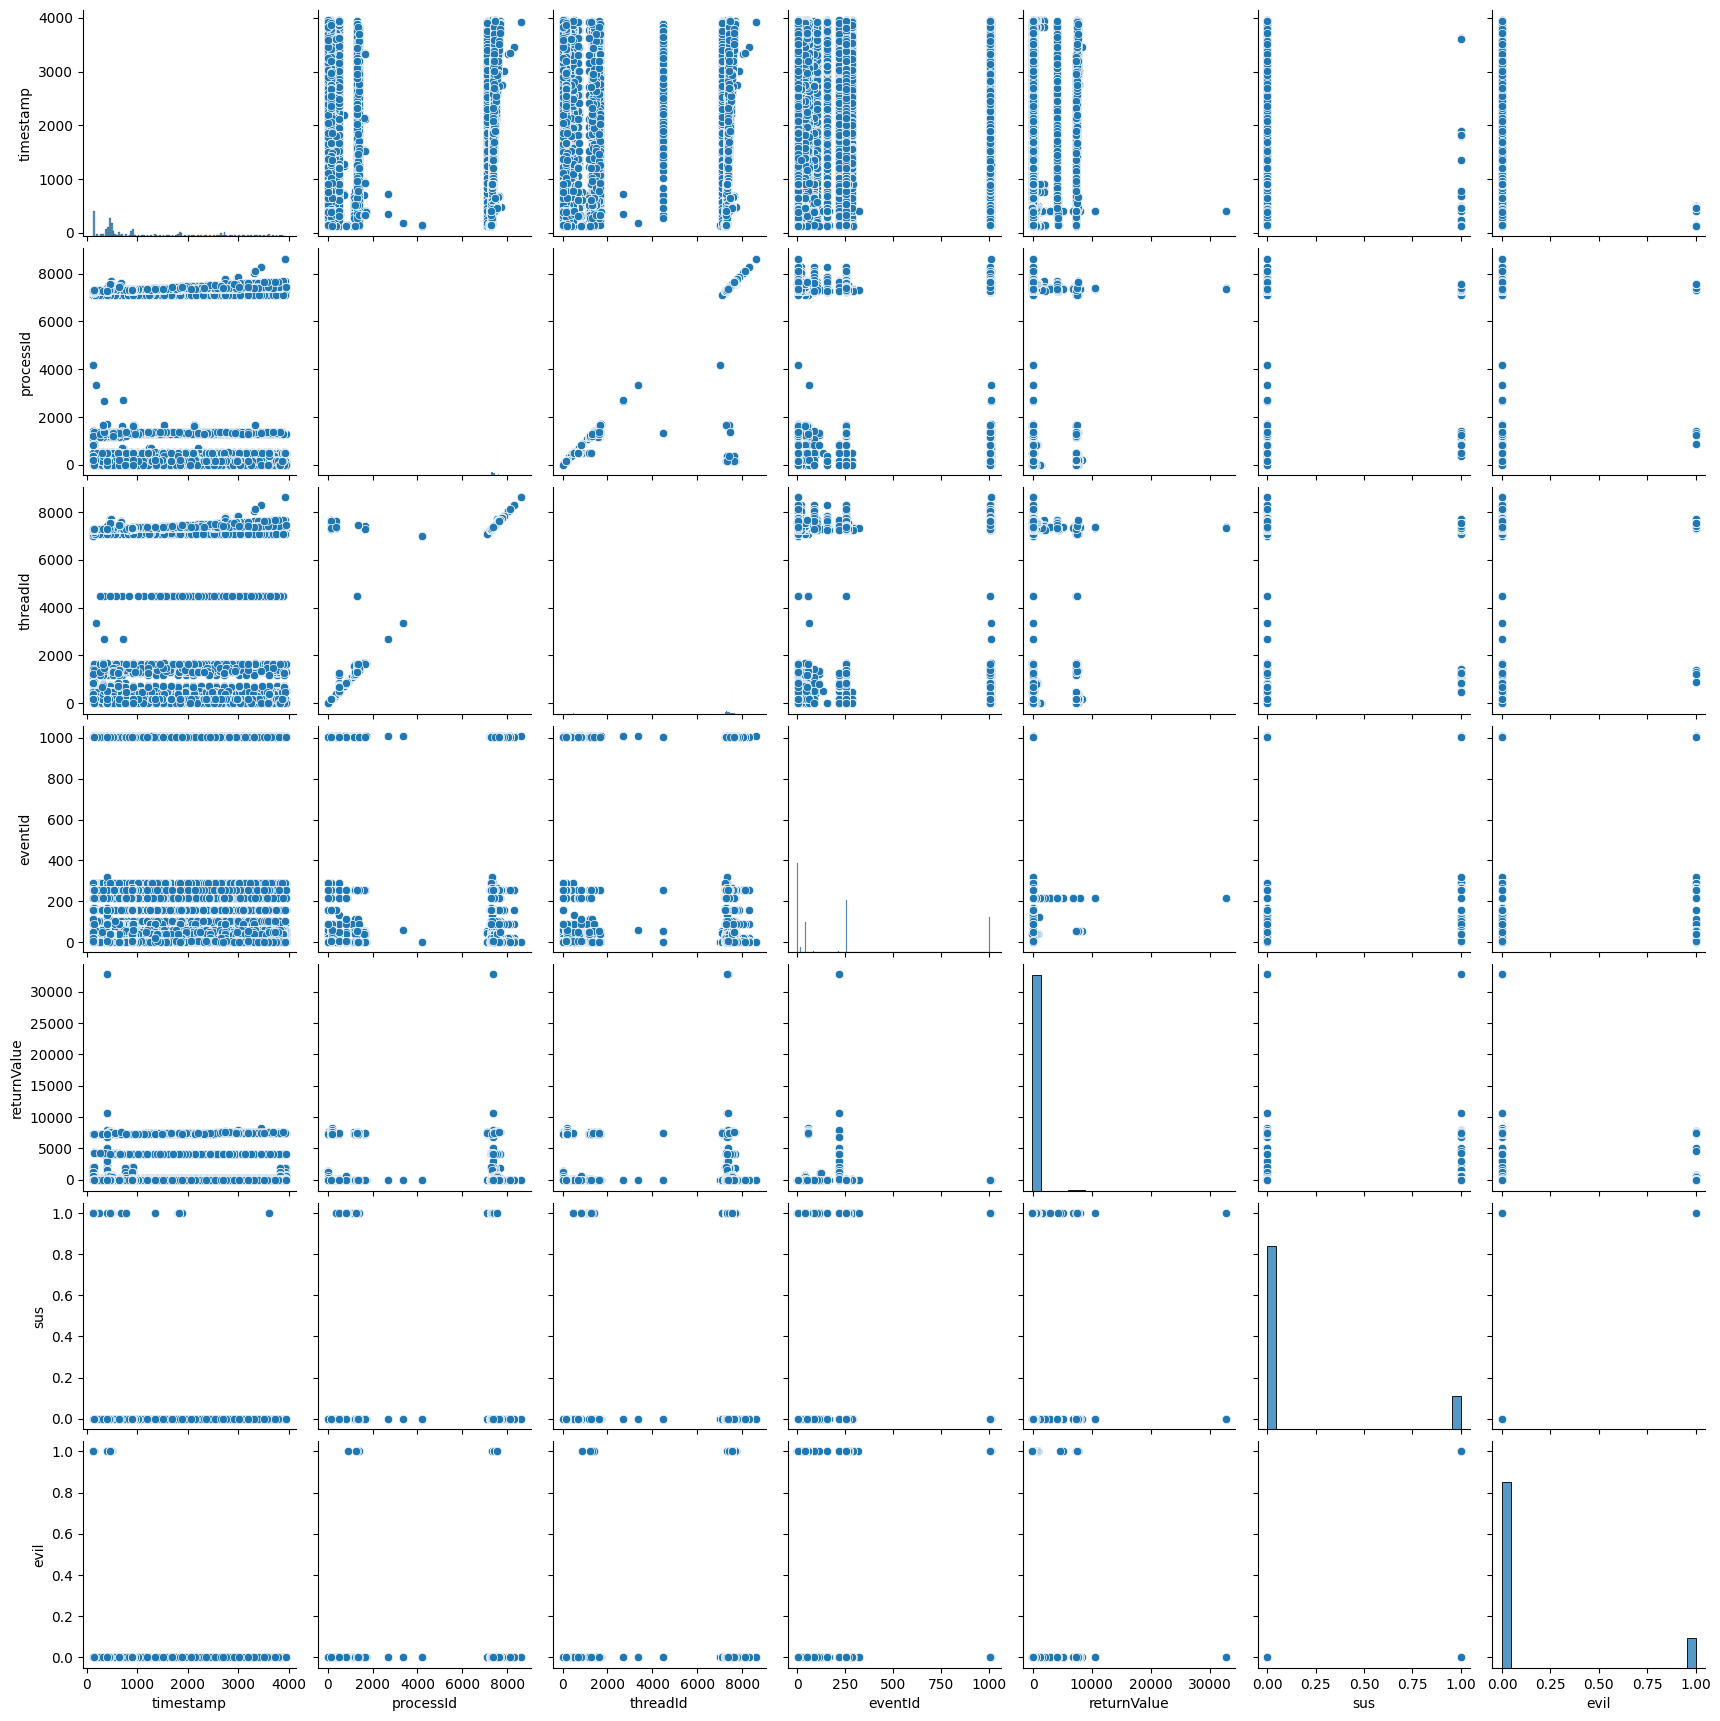

In [15]:
sns.pairplot(new)

In [16]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1141078 entries, 0 to 1141077
Data columns (total 16 columns):
 #   Column           Non-Null Count    Dtype  
---  ------           --------------    -----  
 0   timestamp        1141078 non-null  float64
 1   processId        1141078 non-null  int64  
 2   threadId         1141078 non-null  int64  
 3   parentProcessId  1141078 non-null  int64  
 4   userId           1141078 non-null  int64  
 5   mountNamespace   1141078 non-null  int64  
 6   processName      1141078 non-null  object 
 7   hostName         1141078 non-null  object 
 8   eventId          1141078 non-null  int64  
 9   eventName        1141078 non-null  object 
 10  stackAddresses   1141078 non-null  object 
 11  argsNum          1141078 non-null  int64  
 12  returnValue      1141078 non-null  int64  
 13  args             1141078 non-null  object 
 14  sus              1141078 non-null  int64  
 15  evil             1141078 non-null  int64  
dtypes: float64(1), int

In [17]:
df.describe()

,timestamp,processId,threadId,parentProcessId,userId,mountNamespace,eventId,argsNum,returnValue,sus,evil
count,1.141078e+06,1.141078e+06,1.141078e+06,1.141078e+06,1.141078e+06,1.141078e+06,1.141078e+06,1.141078e+06,1.141078e+06,1.141078e+06,1.141078e+06
mean,1.367449e+03,6.909070e+03,6.913038e+03,2.467229e+03,1.437311e+02,4.026532e+09,2.372977e+02,2.671557e+00,3.018248e+00,1.520615e-01,1.388441e-01
std,1.154433e+03,1.816699e+03,1.807393e+03,2.862640e+03,3.500947e+02,1.726697e+02,3.548319e+02,1.250393e+00,3.223468e+02,3.590806e-01,3.457840e-01
min,1.244392e+02,1.000000e+00,1.000000e+00,0.000000e+00,0.000000e+00,4.026532e+09,2.000000e+00,0.000000e+00,-1.150000e+02,0.000000e+00,0.000000e+00
25%,4.612974e+02,7.301000e+03,7.301000e+03,1.870000e+02,0.000000e+00,4.026532e+09,4.000000e+00,1.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00
50%,9.033516e+02,7.366000e+03,7.366000e+03,1.385000e+03,0.000000e+00,4.026532e+09,4.200000e+01,3.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00
75%,2.327305e+03,7.461000e+03,7.461000e+03,4.489000e+03,0.000000e+00,4.026532e+09,2.570000e+02,4.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00
max,3.954588e+03,8.619000e+03,8.619000e+03,7.672000e+03,1.001000e+03,4.026532e+09,1.010000e+03,5.000000e+00,3.276800e+04,1.000000e+00,1.000000e+00


#STEP 4 ENCODING

In [18]:
#Target column encoding
def encode_text_index(df,name):
  le = preprocessing.LabelEncoder()
  df[name] = le.fit_transform(df[name])
  return le.classes_

In [19]:
#Target column encoding
from sklearn import preprocessing
#def encode_text_index(df,name):
le = preprocessing.LabelEncoder()
le.fit_transform(df['hostName'])
le_name_mapping = dict(zip(le.classes_, le.transform(le.classes_)))
print(le_name_mapping)

{'ip-10-100-1-120': 0, 'ip-10-100-1-129': 1, 'ip-10-100-1-165': 2, 'ip-10-100-1-169': 3, 'ip-10-100-1-173': 4, 'ip-10-100-1-217': 5, 'ip-10-100-1-28': 6, 'ip-10-100-1-34': 7, 'ip-10-100-1-55': 8, 'ip-10-100-1-57': 9, 'ip-10-100-1-79': 10, 'ubuntu': 11}


In [20]:
#Encoding the numeric column
def  encode_numeric_zscore(df, name, mean=None, sd=None):
  if mean is None:
    mean= df[name].mean()

  if sd is None:
    sd=df[name].std()

  df[name] = (df[name] - mean) / sd

In [21]:
encode_numeric_zscore(df,'mountNamespace')
encode_numeric_zscore(df,'threadId')
encode_numeric_zscore(df,'processId')
encode_numeric_zscore(df,'timestamp')
encode_numeric_zscore(df,'parentProcessId')
encode_numeric_zscore(df,'eventId')
encode_numeric_zscore(df,'returnValue')

In [22]:
hostNmae = encode_text_index(df,'hostName')
df.head()

,timestamp,processId,threadId,parentProcessId,userId,mountNamespace,processName,hostName,eventId,eventName,stackAddresses,argsNum,returnValue,args,sus,evil
0,1.726920,0.104547,0.102890,-0.861523,0,-0.651332,sshd,9,-0.660306,close,[],1,-0.009363,"[{'name': 'fd', 'type': 'int', 'value': 7}]",0,0
1,0.722698,0.255920,0.255042,-0.285830,0,-0.651332,ps,6,2.163566,security_file_open,"[139984668999339, 32758250075010869]",4,-0.009363,"[{'name': 'pathname', 'type': 'const char*', '...",0,0
2,1.154679,0.275736,0.274961,0.706261,0,-0.651332,ps,7,0.055526,openat,[],4,0.018557,"[{'name': 'dirfd', 'type': 'int', 'value': -10...",0,0
3,-0.391635,0.205279,0.204140,-0.796548,0,1.532028,systemd-udevd,11,-0.660306,close,[],1,-0.009363,"[{'name': 'fd', 'type': 'unsigned int', 'value...",0,0
4,-0.402277,0.243810,0.242870,-0.796198,0,1.532028,systemd-udevd,11,-0.654670,fstat,[],2,-0.009363,"[{'name': 'fd', 'type': 'int', 'value': 15}, {...",0,0


In [23]:
df.replace([np.inf, -np.inf], np.nan, inplace=True)
df.fillna(0, inplace=True)

#STEP 5 Training Testing Spliting

In [24]:
y=df[['evil']].copy()

In [25]:
feature_selection=['timestamp','processId','threadId','eventId','returnValue']

In [26]:
X=df[feature_selection].copy()

In [27]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.22, random_state=350)

In [28]:
!pip install joblib
import joblib


#Random Forest

In [30]:
from sklearn.ensemble import RandomForestClassifier

RF_classifier = RandomForestClassifier(n_estimators = 40, criterion = 'entropy', max_leaf_nodes=30, random_state = 350)
RF_classifier.fit(X_train, y_train)

# Save the model
joblib.dump(RF_classifier, "/content/RF_classifier.pkl")


<ipython-input-30-84af6b825c17>:4: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  RF_classifier.fit(X_train, y_train)


['/content/RF_classifier.pkl']

In [31]:
from sklearn.metrics import classification_report, confusion_matrix

y_predict_train = RF_classifier.predict(X_train)
y_predict_train
#cm = confusion_matrix(y_train, y_predict_train)
#sns.heatmap(cm, annot=True)

array([0, 0, 0, ..., 0, 1, 0])

In [32]:
# Predicting the Test set results
y_predict_test = RF_classifier.predict(X_test)
#cm = confusion_matrix(y_test, y_predict_test)
#sns.heatmap(cm, annot=True)

In [33]:
print(classification_report(y_test, y_predict_test))

              precision    recall  f1-score   support

           0       1.00      1.00      1.00    216041
           1       1.00      1.00      1.00     34997

    accuracy                           1.00    251038
   macro avg       1.00      1.00      1.00    251038
weighted avg       1.00      1.00      1.00    251038



# Gradient Boosting

In [34]:
from sklearn.ensemble import GradientBoostingClassifier

GBDT_classifier = GradientBoostingClassifier()
GBDT_classifier.fit(X_train, y_train)

# Save the model
joblib.dump(GBDT_classifier, "/content/GBDT_classifier.pkl")


/usr/local/lib/python3.10/dist-packages/sklearn/ensemble/_gb.py:437: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


['/content/GBDT_classifier.pkl']

In [35]:
from sklearn.metrics import classification_report, confusion_matrix

y_predict_train = GBDT_classifier.predict(X_train)
y_predict_train
#cm = confusion_matrix(y_train, y_predict_train)
#sns.heatmap(cm, annot=True)

array([0, 0, 0, ..., 0, 1, 0])

In [36]:
# Predicting the Test set results
y_predict_test = GBDT_classifier.predict(X_test)
#cm = confusion_matrix(y_test, y_predict_test)
#sns.heatmap(cm, annot=True)

In [37]:
print(classification_report(y_test, y_predict_test))

              precision    recall  f1-score   support

           0       1.00      1.00      1.00    216041
           1       1.00      0.99      1.00     34997

    accuracy                           1.00    251038
   macro avg       1.00      1.00      1.00    251038
weighted avg       1.00      1.00      1.00    251038



# *XGBoost*

In [38]:
from xgboost import XGBClassifier

XGB_classifier = XGBClassifier()
XGB_classifier.fit(X_train, y_train)

# Save the model
joblib.dump(XGB_classifier, "/content/XGB_classifier.pkl")


['/content/XGB_classifier.pkl']

In [39]:
from sklearn.metrics import classification_report, confusion_matrix, accuracy_score

y_predict_train = XGB_classifier.predict(X_train)
y_predict_train
#cm = confusion_matrix(y_train, y_predict_train)
#sns.heatmap(cm, annot=True)

array([0, 0, 0, ..., 0, 1, 0])

In [40]:
# Predicting the Test set results
y_predict_test = XGB_classifier.predict(X_test)
#cm = confusion_matrix(y_test, y_predict_test)
#sns.heatmap(cm, annot=True)

In [41]:
print(classification_report(y_test, y_predict_test))

              precision    recall  f1-score   support

           0       1.00      1.00      1.00    216041
           1       1.00      1.00      1.00     34997

    accuracy                           1.00    251038
   macro avg       1.00      1.00      1.00    251038
weighted avg       1.00      1.00      1.00    251038



# K-NN

In [42]:
from sklearn.neighbors import KNeighborsClassifier

neigh = KNeighborsClassifier()
neigh.fit(X_train, y_train)

# Save the model
joblib.dump(neigh, "/content/KNN_classifier.pkl")


/usr/local/lib/python3.10/dist-packages/sklearn/neighbors/_classification.py:215: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return self._fit(X, y)


['/content/KNN_classifier.pkl']

In [43]:
from sklearn.metrics import classification_report, confusion_matrix

y_predict_train = neigh.predict(X_train)
y_predict_train



array([0, 0, 0, ..., 0, 1, 0])

In [44]:
y_predict_test = neigh.predict(X_test)

In [45]:
print(classification_report(y_test, y_predict_test))

              precision    recall  f1-score   support

           0       1.00      1.00      1.00    216041
           1       1.00      1.00      1.00     34997

    accuracy                           1.00    251038
   macro avg       1.00      1.00      1.00    251038
weighted avg       1.00      1.00      1.00    251038



# Naive Bayes


In [47]:
from sklearn.naive_bayes import GaussianNB

neigh = GaussianNB()
neigh.fit(X_train, y_train)

# Save the model
joblib.dump(neigh, "/content/GaussianNB_classifier.pkl")



/usr/local/lib/python3.10/dist-packages/sklearn/utils/validation.py:1143: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


['/content/GaussianNB_classifier.pkl']

In [48]:
from sklearn.metrics import classification_report, confusion_matrix

y_predict_train = neigh.predict(X_train)
y_predict_train


array([0, 0, 0, ..., 0, 1, 0])

In [49]:
y_predict_test = neigh.predict(X_test)

In [50]:
print(classification_report(y_test, y_predict_test))

              precision    recall  f1-score   support

           0       1.00      1.00      1.00    216041
           1       0.97      0.98      0.97     34997

    accuracy                           0.99    251038
   macro avg       0.98      0.99      0.99    251038
weighted avg       0.99      0.99      0.99    251038



# DecisionTree

In [51]:
from sklearn.tree import DecisionTreeClassifier

DT_classifier = DecisionTreeClassifier(max_leaf_nodes=30, random_state = 350)
DT_classifier.fit(X_train, y_train)

# Save the model
joblib.dump(DT_classifier, "/content/DT_classifier.pkl")


['/content/DT_classifier.pkl']

In [52]:
from sklearn.metrics import classification_report, confusion_matrix, accuracy_score

y_predict_train = DT_classifier.predict(X_train)
y_predict_train
#cm = confusion_matrix(y_train, y_predict_train)
#sns.heatmap(cm, annot=True)

array([0, 0, 0, ..., 0, 1, 0])

In [53]:
# Predicting the Test set results
y_predict_test = DT_classifier.predict(X_test)
#cm = confusion_matrix(y_test, y_predict_test)
#sns.heatmap(cm, annot=True)

In [54]:
print(classification_report(y_test, y_predict_test))

              precision    recall  f1-score   support

           0       1.00      1.00      1.00    216041
           1       1.00      1.00      1.00     34997

    accuracy                           1.00    251038
   macro avg       1.00      1.00      1.00    251038
weighted avg       1.00      1.00      1.00    251038



# Adaboost

In [55]:
from sklearn.ensemble import AdaBoostClassifier

AB_classifier = AdaBoostClassifier(n_estimators = 40,  random_state = 350)
AB_classifier.fit(X_train, y_train)

# Save the model
joblib.dump(AB_classifier, "/content/AB_classifier.pkl")


/usr/local/lib/python3.10/dist-packages/sklearn/utils/validation.py:1143: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


['/content/AB_classifier.pkl']

In [56]:
from sklearn.metrics import classification_report, confusion_matrix

y_predict_train = AB_classifier.predict(X_train)
y_predict_train

array([0, 0, 0, ..., 0, 1, 0])

In [57]:
y_predict_test = AB_classifier.predict(X_test)

In [58]:
print(classification_report(y_test, y_predict_test))

              precision    recall  f1-score   support

           0       1.00      1.00      1.00    216041
           1       1.00      0.99      0.99     34997

    accuracy                           1.00    251038
   macro avg       1.00      0.99      1.00    251038
weighted avg       1.00      1.00      1.00    251038



# Step 6 : ROC Curve

In [57]:
import matplotlib.pyplot as plt
from sklearn import metrics

from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import GradientBoostingClassifier
from sklearn.ensemble import RandomForestClassifier
from xgboost import XGBClassifier
XGB_classifier = XGBClassifier()

<ipython-input-58-c59470eea2cf>:6: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  model.fit(X_train, y_train)
/usr/local/lib/python3.10/dist-packages/sklearn/ensemble/_gb.py:437: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/usr/local/lib/python3.10/dist-packages/sklearn/utils/validation.py:1143: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


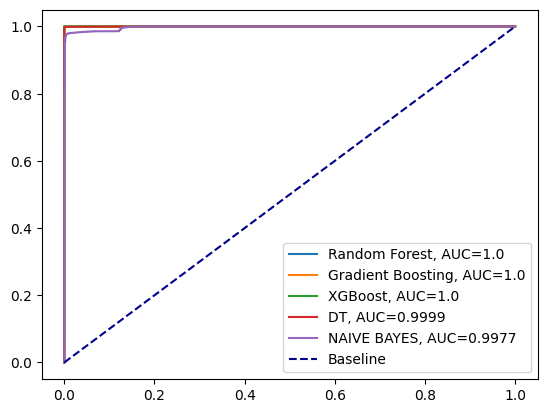

In [58]:
#set up plotting area
plt.figure(0).clf()

#fit Random Forest model and plot ROC curve
model = RandomForestClassifier()
model.fit(X_train, y_train)
y_pred = model.predict_proba(X_test)[:, 1]
fpr, tpr, _ = metrics.roc_curve(y_test, y_pred)
auc = round(metrics.roc_auc_score(y_test, y_pred), 4)
plt.plot(fpr,tpr,label="Random Forest, AUC="+str(auc))

#fit Gradient Boosting model and plot ROC curve
model = GradientBoostingClassifier()
model.fit(X_train, y_train)
y_pred = model.predict_proba(X_test)[:, 1]
fpr, tpr, _ = metrics.roc_curve(y_test, y_pred)
auc = round(metrics.roc_auc_score(y_test, y_pred), 4)
plt.plot(fpr,tpr,label="Gradient Boosting, AUC="+str(auc))

#fit XGBoost model and plot ROC curve
model = XGBClassifier()
model.fit(X_train, y_train)
y_pred = model.predict_proba(X_test)[:, 1]
fpr, tpr, _ = metrics.roc_curve(y_test, y_pred)
auc = round(metrics.roc_auc_score(y_test, y_pred), 4)
plt.plot(fpr,tpr,label="XGBoost, AUC="+str(auc))

#fit DT model and plot ROC curve
model = DT_classifier
model.fit(X_train, y_train)
y_pred = model.predict_proba(X_test)[:, 1]
fpr, tpr, _ = metrics.roc_curve(y_test, y_pred)
auc = round(metrics.roc_auc_score(y_test, y_pred), 4)
plt.plot(fpr,tpr,label="DT, AUC="+str(auc))


#fit NAIVE BAYES model and plot ROC curve

model = GaussianNB()
model.fit(X_train, y_train)
y_pred = model.predict_proba(X_test)[:, 1]
fpr, tpr, _ = metrics.roc_curve(y_test, y_pred)
auc = round(metrics.roc_auc_score(y_test, y_pred), 4)
plt.plot(fpr,tpr,label="NAIVE BAYES, AUC="+str(auc))



# Plot line with no predictive power (baseline)
plt.plot([0, 1], [0, 1], color='darkblue', linestyle='--', label='Baseline')

#add legend
plt.legend()